In [2]:
from bs4 import BeautifulSoup # parsing the HTML contents
import requests # requests for approval for the data to be web scrapped, and also to get the html contents
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
url = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"
r = requests.get(url)
#r.status_code
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE HTML>
<html lang="en"><head><meta charset="utf-8"/><title>Inflation rates in Nigeria</title><link href="https://js.worlddata.info" rel="preconnect"/><link href="https://js.worlddata.info" rel="dns-prefetch"/><link href="https://cdn.worlddata.info" rel="preconnect"/><link href="https://cdn.worlddata.info" rel="dns-prefetch"/><link href="https://www.laenderdaten.info/Afrika/Nigeria/inflationsraten.php" hreflang="de" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" hreflang="en" rel="alternate"/><link href="https://www.datosmundial.com/africa/nigeria/inflacion.php" hreflang="es" rel="alternate"/><link href="https://www.dadosmundiais.com/africa/nigeria/inflacao.php" hreflang="pt" rel="alternate"/><link href="https://www.donneesmondiales.com/afrique/nigeria/inflation.php" hreflang="fr" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" id="canonical" rel="canonical"/><meta content="Development of i

In [4]:
len(soup.find_all("table"))

1

In [5]:
#lets save them in a list 
list_row = []
for header in soup.find_all("th"):
    list_row.append(header.text)

df1 = pd.DataFrame(columns= list_row)
row_team = []
tr_ = soup.find_all("tr")
list_of_rows = []
for table_row in range(1,len(tr_)):   
    list_for_each_row = []
    tr_mini = tr_[table_row]
    for row in tr_mini:
        list_for_each_row.append(row.text)
    list_of_rows.append(list_for_each_row)

for i in list_of_rows:
    df1.loc[len(df1)] = i


#     list_of_rows.append(list_for_each_row)
#     print(list_of_rows)
df1

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,n/a
58,1963,-2.69 %,2.92 %,1.24 %,n/a
59,1962,5.27 %,3.55 %,1.20 %,n/a
60,1961,6.28 %,2.08 %,1.07 %,n/a


In [6]:
df1.columns

Index(['Year', 'Nigeria', 'Ø EU', 'Ø USA', 'Ø World'], dtype='object')

In [7]:
new_column_name = ['Year', 'Nigeria', 'EUROPE', 'USA', 'World']

In [8]:
df1.columns = new_column_name
df1.head()

,Year,Nigeria,EUROPE,USA,World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %


In [9]:
df1.isna().sum() 

Year       0
Nigeria    0
EUROPE     0
USA        0
World      0
dtype: int64

In [10]:
columns_name = df1.columns
columns_name

Index(['Year', 'Nigeria', 'EUROPE', 'USA', 'World'], dtype='object')

In [11]:
for col in columns_name:
    df1[col] = df1[col].replace("%","")

In [12]:
df1.dtypes

Year       object
Nigeria    object
EUROPE     object
USA        object
World      object
dtype: object

In [13]:
df1

,Year,Nigeria,EUROPE,USA,World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,n/a
58,1963,-2.69 %,2.92 %,1.24 %,n/a
59,1962,5.27 %,3.55 %,1.20 %,n/a
60,1961,6.28 %,2.08 %,1.07 %,n/a


In [14]:
df1.describe

<bound method NDFrame.describe of     Year  Nigeria  EUROPE     USA   World
0   2021  16.95 %  2.55 %  4.70 %  3.42 %
1   2020  13.25 %  0.50 %  1.23 %  1.92 %
2   2019  11.40 %  1.63 %  1.81 %  2.19 %
3   2018  12.09 %  1.74 %  2.44 %  2.44 %
4   2017  16.52 %  1.43 %  2.13 %  2.19 %
..   ...      ...     ...     ...     ...
57  1964   0.86 %  3.42 %  1.28 %     n/a
58  1963  -2.69 %  2.92 %  1.24 %     n/a
59  1962   5.27 %  3.55 %  1.20 %     n/a
60  1961   6.28 %  2.08 %  1.07 %     n/a
61  1960   5.44 %  1.74 %  1.46 %     n/a

[62 rows x 5 columns]>

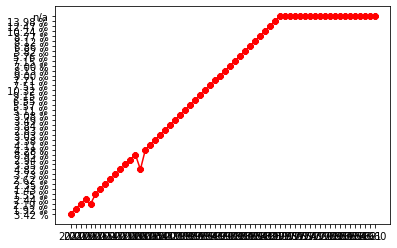

In [22]:
plt.plot(df1['World'].set_axis(df1['Year']), c='red', marker='8', label='World')
plt.show()

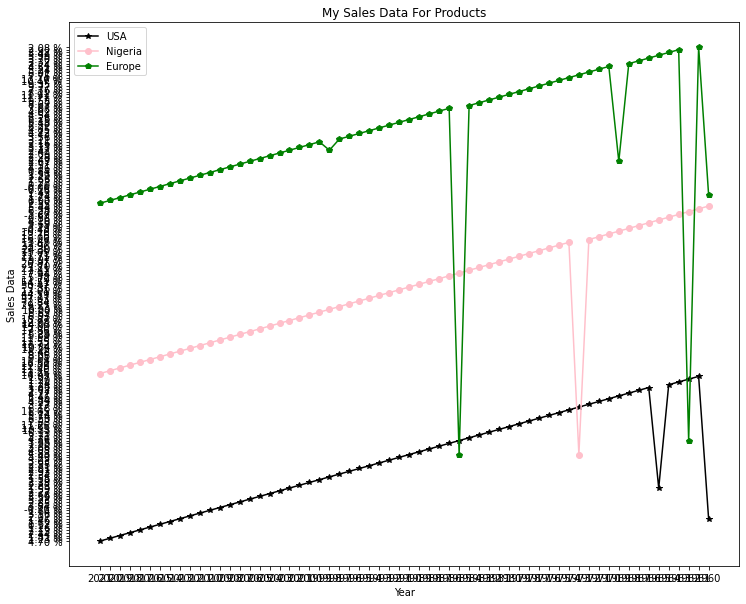

In [21]:
plt.figure(figsize=(12,10))
plt.plot(df1['USA'].set_axis(df1['Year']), c='black', marker='*', label='USA')
plt.plot(df1['Nigeria'].set_axis(df1['Year']), c='pink', marker='o', label='Nigeria')
plt.plot(df1['EUROPE'].set_axis(df1['Year']), c='green', marker='p', label='Europe')
plt.xlabel('Year')
plt.ylabel('Sales Data')
plt.title('My Sales Data For Products')
plt.legend(loc=2)
plt.show()